Presentado por: Laura López Bedoya

# ANÁLISIS EXPLORATORIO DATASET dataset_if

En este notebook encontrarás un análisis exploratorio del dataset dataset_if. 
A partir de información histórica recopilada sobre clientes de cierto supermercado se pretende determinar la propensión de que un cliente acepte una oferta o no. A partir de las variables recolectadas se pretende realizar un algoritmo de machine learning solucionar esté caso.

__DICCIONARIO:__
- ID: ID Cliente
- Year_Birth: Fecha de nacimiento
- Education: Nivel maximo de educación
- Marital_Status: Estatus Civil
- Income: Ingresos
- Kidhome: Hijos en la familia
- Teenhome: Adolescentes en la familia
- Dt_Customer: Fecha de observación
- Recency: Días desde la ultima compra
- MntWines: Gasto últimos 2 años en vinos
- MntFruits: Gasto últimos 2 años en frutas
- MntMeatProducts: Gasto últimos 2 años en productos carnicos
- MntFishProducts: Gasto últimos 2 años en productos de mar
- MntSweetProducts: Gasto últimos 2 años en golosinas
- MntGoldProds: Gasto últimos 2 años en productos premium
- NumDealsPurchases: Número de compras en oferta
- NumWebPurchases: Número de compras online
- NumCatalogPurchases: Número de compras por catalogo
- NumStorePurchases: Número de compras en tienda física
- NumWebVisitsMonth: Número de visitas por mes en la web
- AcceptedCmp3: el cliente acepto la oferta en la tercera campaña
- AcceptedCmp4: el cliente acepto la oferta en la cuarta campaña
- AcceptedCmp5: el cliente acepto la oferta en la quinta campaña
- AcceptedCmp1: el cliente acepto la oferta en la primera campaña
- AcceptedCmp2: el cliente acepto la oferta en la segunda campaña
- Complain: si el comprador realizo una queja en los ultimos 2 años
- Z_CostContact: Variables Normalizadas
- Z_Revenue: Variables Normalizadas
- Response: Variable Objetivo
- Age: Edad

__Variable objetivo__

Response

### Importar librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Cargar datos

In [2]:
dataset = pd.read_csv('dataset_if.csv', sep=';')

### Análisis exploratorio

Muestra del dataset:

In [3]:
dataset.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
814,6303,1986,PhD,Together,91820,0,0,23/11/2013,72,410,73,747,76,161,30,0,5,5,12,1,0,0,0,0,0,0,3,11,0,28
1406,5491,1951,Master,Together,47352,0,1,11/04/2013,70,172,12,112,8,0,15,4,6,1,5,7,0,0,0,0,0,0,3,11,0,63
447,1137,1964,Graduation,Single,81246,0,0,29/12/2013,87,398,190,537,61,156,37,1,4,5,7,1,1,0,0,1,0,0,3,11,0,50
1759,5883,1972,Graduation,Married,77981,1,0,26/05/2013,78,138,120,204,16,126,60,3,7,4,7,5,0,0,0,0,0,0,3,11,0,42
1226,4058,1955,PhD,Single,61284,0,0,12/10/2013,76,618,15,106,20,7,45,1,11,2,8,6,0,1,0,0,0,0,3,11,0,59


Tamaño del dataset:

In [4]:
dataset.shape

(2240, 30)

Información del dataset:

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2240 non-null   int64 
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

- Se observa que el dataset está completo
- La mayoria de las columnas tienen el tipo de dato correcto, sin embargo, los campos Year_Birth y Dt_Customer deberían ser datatime; algunos de los datos pueden ser categoricos, sin embargo, para la posterior implementación del modelo el tipo int está bien.

Datos estadísticos de las variables numéricas:

In [6]:
dataset.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
count,2240.000000,2240.000000,2240.00000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,5592.159821,1968.805804,51963.20000,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,45.194196
std,3246.662198,11.984069,21405.89641,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069
min,0.000000,1893.000000,1730.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,18.000000
25%,2828.250000,1959.000000,35538.75000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,37.000000
50%,5458.500000,1970.000000,51373.00000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,44.000000
75%,8427.750000,1977.000000,68275.75000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,55.000000
max,11191.000000,1996.000000,162397.00000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,121.000000


- Se observa que las variables tienen un rango sin evidencia de atípicos, sin embargo, más adelante se realizarán graficas para comprobar.
- Las columnas Z_CostContact y Z_Revenue contienen el mismo valor.
- En la columna edad el valor maximo es 121, sin embargo, no se puede considerar como atípico.

Datos estadísticos de las variables categoricas:

In [7]:
dataset.describe(include='O')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31/08/2012
freq,1127,864,12


- El nivel de educación más común de las personas registradas es Graduado (Graduation), dentro de 5 opciones.
- El estado civil más común entre las personas registradas es Casado (Married), dentro de 8 opciones disponibles.
- La fecha con más registros es 31/08/2012 (en total 12).

Validar si existen valores Na:

In [8]:
dataset.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
dtype: int64

Validar si existen datos duplicados:

In [9]:
dataset[dataset.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age


Como se mencionó anteriormente en el análisis estadístico las variables Z_CostContact y Z_Revenue contienen un valor único.

Validar esa información:

In [10]:
dataset['Z_CostContact'].unique()

array([3], dtype=int64)

In [11]:
dataset['Z_Revenue'].unique()

array([11], dtype=int64)

Luego de validar esta información se decide eliminar las columnas dado que no le aportan al análisis y al modelo que se desea implementar.

In [12]:
dataset = dataset.drop(['Z_CostContact','Z_Revenue'],axis=1)

Convertir columnas Year_Birth y Dt_Customer a datetime para facilitar su manipulación:

In [13]:
dataset['Year_Birth'] = pd.to_datetime(dataset.Year_Birth, format='%Y')

dataset['Dt_Customer'] = pd.to_datetime(dataset.Dt_Customer, format='%d/%m/%Y')

In [14]:
dataset['Dt_Customer'].head()

0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]

In [15]:
dataset['Year_Birth'].head()

0   1957-01-01
1   1954-01-01
2   1965-01-01
3   1984-01-01
4   1981-01-01
Name: Year_Birth, dtype: datetime64[ns]

### Visualización de datos

Correlación de variables:

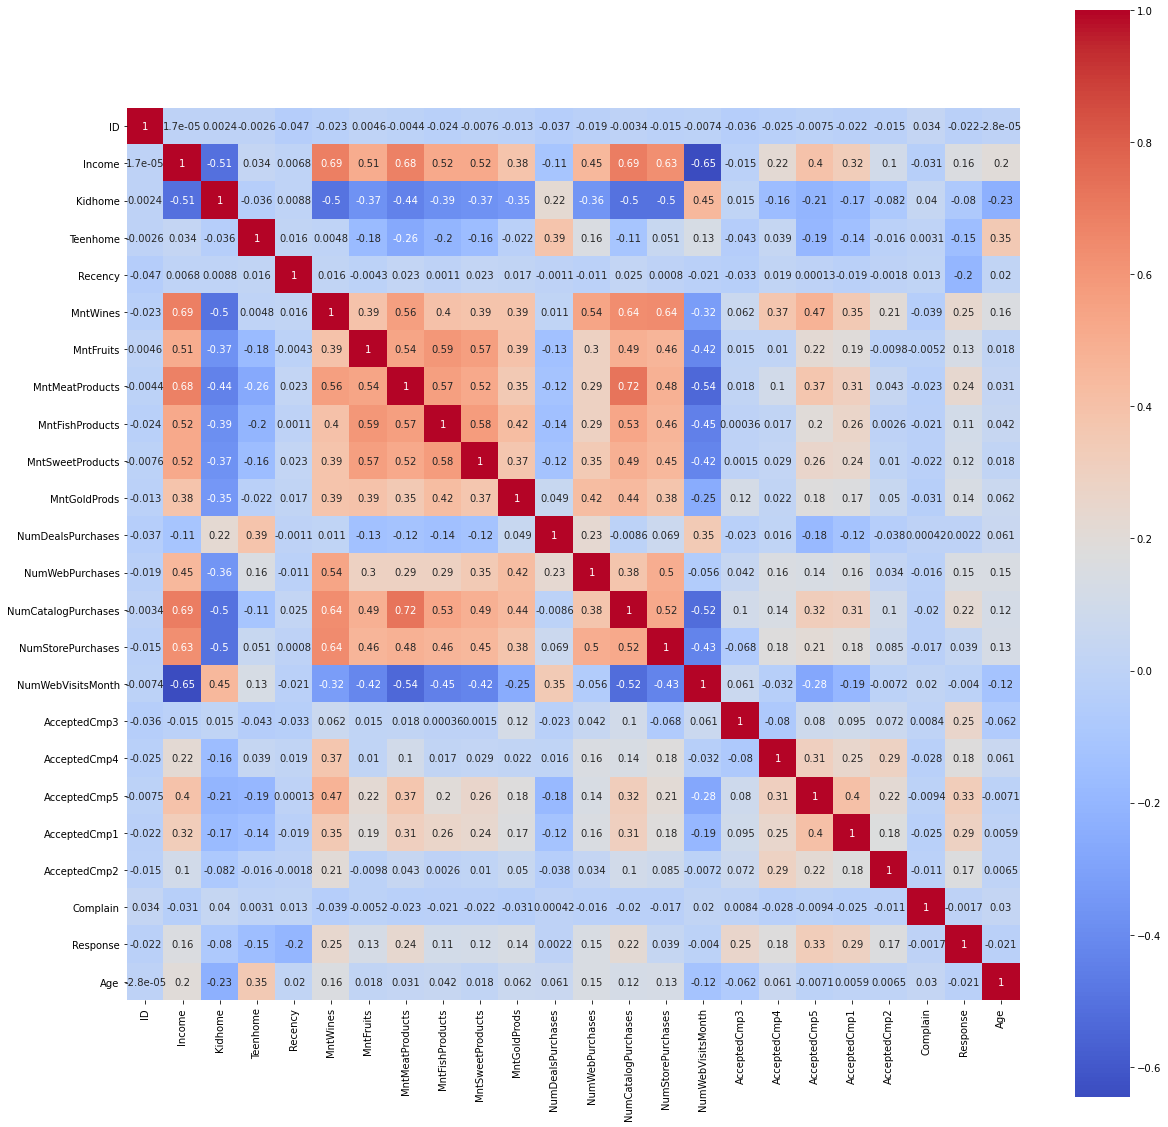

In [16]:
plt.figure(figsize=(20,20)) #Mapa de calor de la correlación de las variables del dataset.
sns.heatmap(dataset.corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

Se observa la correlación de las columnas del dataframe:
- No hay una correlación fuerte positiva o negativa de las columnas con la variable objetivo _Response_
- Existe una correlación de -1 entre el año de nacimineto y la edad, esto nos ayuda a confirmar la calidad de las variables, lo que quiere decir que a mayor año, menor edad. En este caso se puede eliminar una de las variables.
- Si consideramos que una correlación de 0.7 o superior es significativa: Los gastos en productos cárnicos tiene una correlación positiva con el número de compras por catálogo. Es probable que las compras de este tipo de productos se realicen más por catálogo.
- Incluso si se toma la correlación cercana a 0.7 como 0.68 - 0.69: Las compras de vino y productos cárnicos tiene correlación positiva con los ingresos, y estos con las compras por catálogo. Es probable que al ser productos más costosos se compran como un gusto o en mayor cantidad cuando los ingresos son altos.

Personas que aceptaron una oferta:

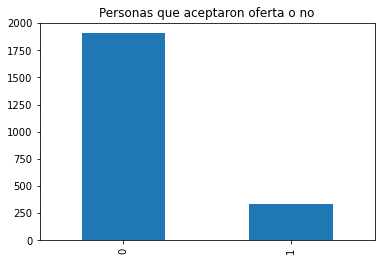

In [17]:
dataset['Response'].value_counts().plot(kind='bar',title = 'Personas que aceptaron oferta o no');

- La mayoria de las personas no aceptan una oferta

Frecuencias relativas:

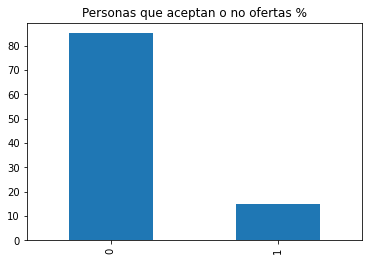

In [18]:
plot = (100 * dataset['Response'].value_counts() / len(dataset['Response'])).plot(
kind='bar', title='Personas que aceptan o no ofertas %')

- Menos del 20% de las personas aceptan ofertas

Distribución de edad:

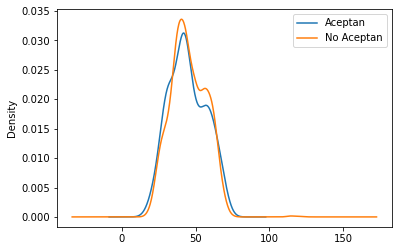

In [19]:
dataset[dataset.Response == 1]["Age"].plot(kind="kde", legend=True, label= "Aceptan");
dataset[dataset.Response == 0]["Age"].plot(kind="kde", legend=True, label= "No Aceptan");

- No hay una diferencia notable de edad entre las personas que aceptan ofertas y las que no.

Edad de las personas que aceptan ofertas:

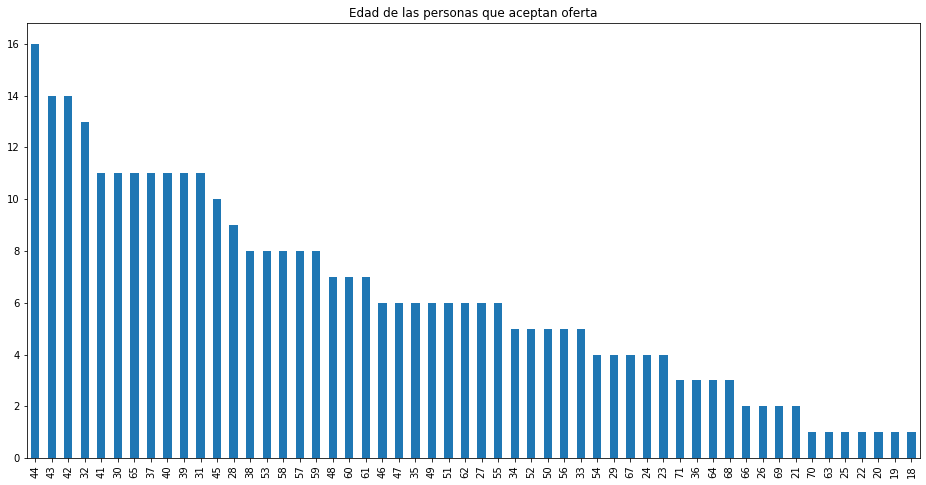

In [20]:
plt.figure(figsize=(16,8))
dataset.Age[dataset.Response==1].value_counts().plot(kind='bar',title = 'Edad de las personas que aceptan oferta');
plt.show()

- La mayoria de las personas que aceptan ofertas están entre 28 y 50 años

Relación de la edad con los ingresos:

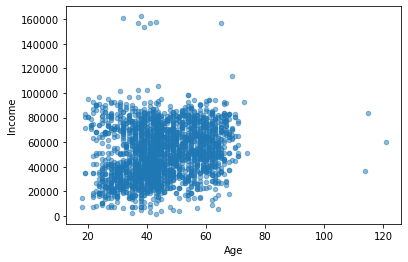

In [21]:
dataset.plot.scatter(x="Age", y="Income", alpha=0.5);

- Entre 30 y 60 años (probablemente edad laboral), un grupo de personas cuenta con ingresos altos.

Distribución de los ingresos:

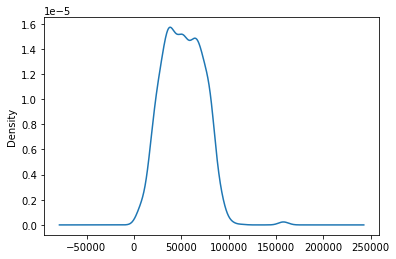

In [22]:
dataset.Income.plot(kind="kde");

Distribución de las variables:

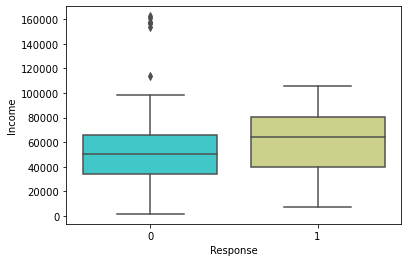

In [23]:
sns.boxplot(x="Response", y="Income", data=dataset,palette='rainbow');

- Comparando la mediana del boxplot las personas que aceptan ofertas cuentan con un ingreso mayor, sin embargo, un pequeño grupo de las personas que no aceptan (se muestran como atípicos) tienen ingresos altos.

Boxplot de las variables numéricas para validar si existen valores atípicos:

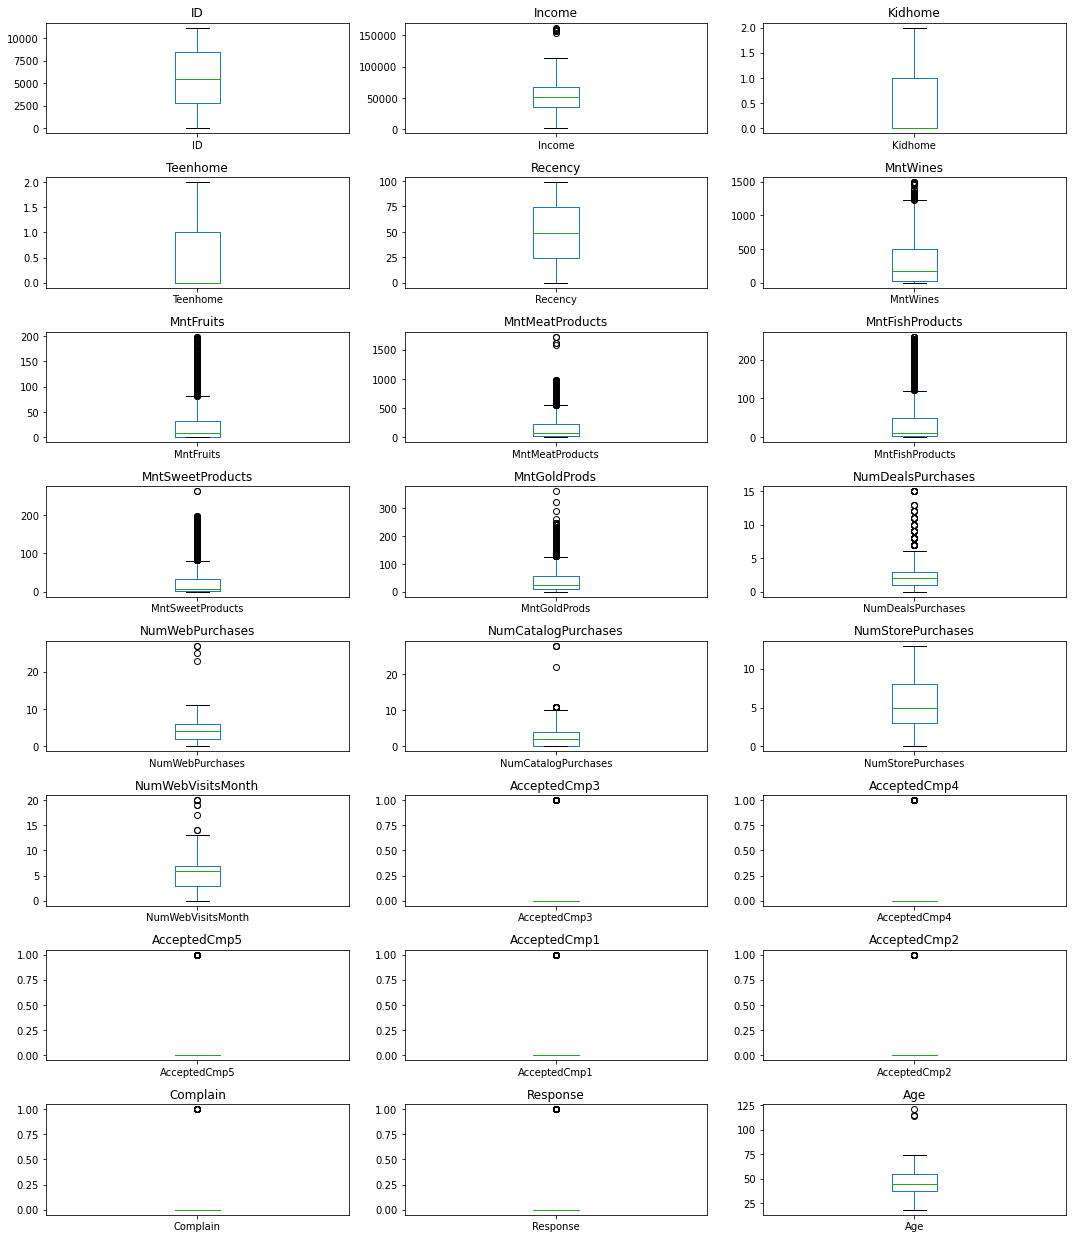

In [24]:
plt.figure(figsize=(15,60))
cols = dataset._get_numeric_data().columns.values

for i in range(0,len(cols)):
    plt.subplot(28,3,i+1)
    dataset[cols[i]].plot.box(); 
    plt.title(cols[i]);

plt.tight_layout()

- Se observan valores atípicos graficamente pero no están muy alejados de los demás.
- Las familias tienen máximo dos niños/adolescentes.
- Los días de compra son espaciados, no tienen un comportamiento fijo.
- Se evidencia un mayor gasto en la compra de los productos cárnicos y vino.
- Las personas prefieren realizar compras por catálogo.

Relación entre las compras online y las visitas mensuales al sitio web:

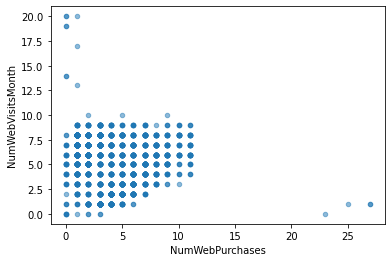

In [25]:
dataset.plot.scatter(x="NumWebPurchases", y="NumWebVisitsMonth", alpha=0.5);

Se observa un comportamiento lineal al incio de la distribución.

Comportamiento de las campañas y su éxito:

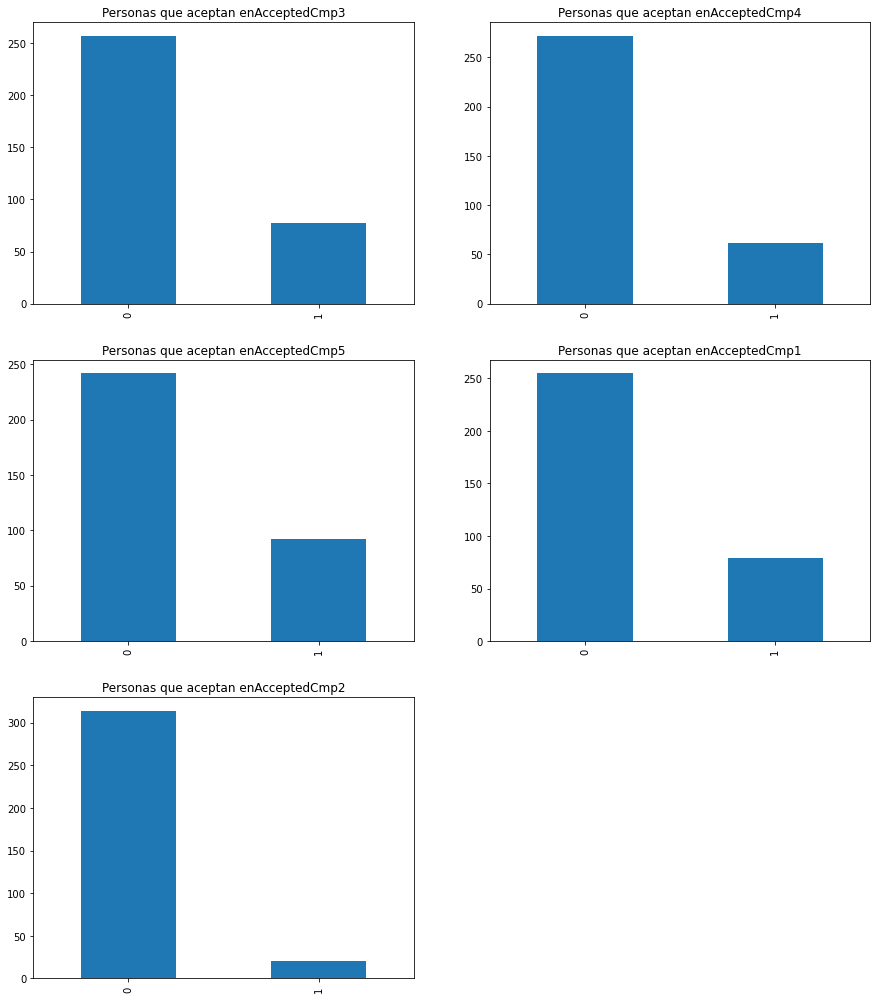

In [26]:
plt.figure(figsize=(15,30))

campanas = ['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2']
j = 0

for i in campanas:
    plt.subplot(5,2,j+1)
    dataset[i][dataset.Response==1].value_counts().plot(kind='bar');
    plt.title('Personas que aceptan en' + i)
    j+=1
plt.show()

- Las personas aceptan menos ofertas en la segunda campaña, las demás campañas se comportan similar.

Nivel educativo:

<AxesSubplot:xlabel='Education', ylabel='count'>

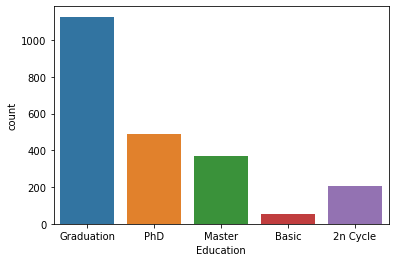

In [27]:
sns.countplot(x='Education',data=dataset)

- La mayoria de las personas registradas tienen un titulo universitario.

Tabla de contingencia Response / Education

In [28]:
pd.crosstab(index=dataset['Response'],
            columns=dataset['Education'], margins=True)

Education,2n Cycle,Basic,Graduation,Master,PhD,All
Response,,,,,,
0,181,52,975,313,385,1906
1,22,2,152,57,101,334
All,203,54,1127,370,486,2240


- El nivel educativo no influye en el hecho de aceptar o no una oferta, sin embargo, pocas personas con un nivel de educación basico las aceptan.

Estado civil:

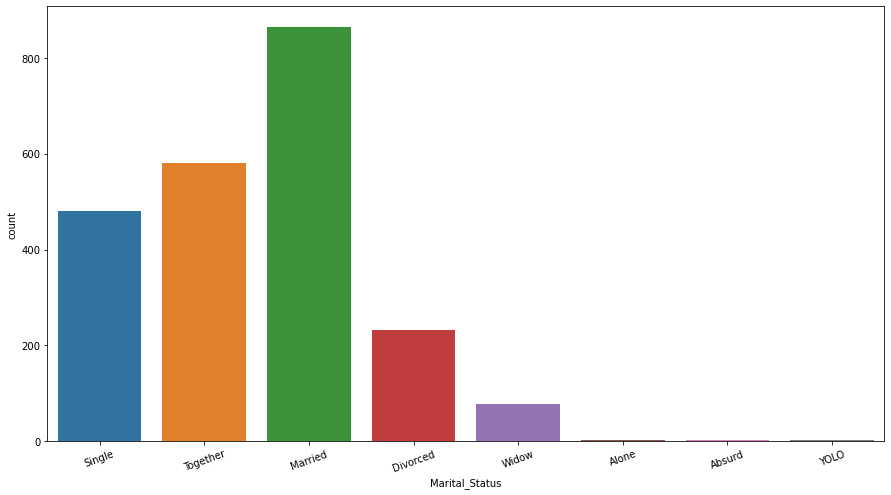

In [29]:
plt.figure(figsize=(15,8))
sns.countplot(x='Marital_Status',data=dataset);
plt.xticks(rotation=20);

- La mayoría de las personas registradas viven en pareja.

Tabla de contingencia Response / Marital_Status

In [30]:
pd.crosstab(index=dataset['Response'],
            columns=dataset['Marital_Status'], margins=True)

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO,All
Response,,,,,,,,,
0,1,2,184,766,374,520,58,1,1906
1,1,1,48,98,106,60,19,1,334
All,2,3,232,864,480,580,77,2,2240


- El estado civil tampoco influye en el aceptar o no una oferta, sin embargo, un porcentaje significativo de las personas solteras aceptan

Quejas en los últimos 2 años:

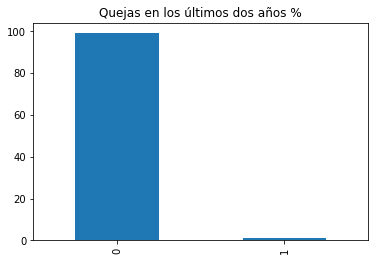

In [31]:
plot = (100 * dataset['Complain'].value_counts() / len(dataset['Complain'])).plot(kind='bar',
                                                                                  title='Quejas en los últimos dos años %')

- Se han recibido pocas quejas en los últimos 2 años

## Preprocesamiento de datos:

In [32]:
dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,1957-01-01,Graduation,Single,58138,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57
1,2174,1954-01-01,Graduation,Single,46344,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60
2,4141,1965-01-01,Graduation,Together,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49
3,6182,1984-01-01,Graduation,Together,26646,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30
4,5324,1981-01-01,PhD,Married,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33


In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   datetime64[ns]
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   int64         
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

Crear variables dummies para variables categoricas:

- Convertir columna de nivel de educación a variable categorica numerica donde cada nivel es representado por un valor numérico:

In [34]:
dataset['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [35]:
dataset['Education'] = dataset['Education'].replace({'Basic':1, '2n Cycle':2, 'Graduation':3, 'Master':4, 'PhD':5})

In [37]:
dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,1957-01-01,3,Single,58138,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57
1,2174,1954-01-01,3,Single,46344,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60
2,4141,1965-01-01,3,Together,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49
3,6182,1984-01-01,3,Together,26646,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30
4,5324,1981-01-01,5,Married,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33


- Convertir columna de estado civil a columnas dummies donde cada estado es representado por 1:

In [38]:
data_ml = pd.get_dummies(dataset, columns =['Marital_Status'],
                         drop_first = True)

In [39]:
data_ml.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957-01-01,3,58138,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,0,0,0,1,0,0,0
1,2174,1954-01-01,3,46344,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,0,0,0,1,0,0,0
2,4141,1965-01-01,3,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,0,0,0,0,1,0,0
3,6182,1984-01-01,3,26646,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,0,0,0,0,1,0,0
4,5324,1981-01-01,5,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,0,0,1,0,0,0,0


### Conclusiones

- No hay una correlación fuerte positiva o negativa de las columnas con la variable objetivo _Response_.
- Menos del 20% de las personas aceptan ofertas.
- No hay una diferencia notable de edad entre las personas que aceptan ofertas y las que no. La edad no influye.
- Entre 30 y 60 años (probablemente edad laboral), un grupo de personas cuenta con ingresos altos.
- La mayoria de las personas registradas tienen un titulo universitario.
- La mayoría de las personas registradas viven en pareja (casadas o en unión libre).
- Se evidencia un mayor gasto en la compra de los productos cárnicos y vino.
- Las personas prefieren realizar compras por catálogo.
- Las personas aceptan menos ofertas en la segunda campaña, las demás campañas se comportan similar.

Luego del preprocesamiento de datos se podrán implementar modelos de ML o DL a los datos:
- No hay valores nulos.
- Todas las variables son numericas (excepto las fechas que dependiendo de su uso se harán modificaciones o se eliminarán).
- No hay datos duplicados.
- La distribución en general de las variables es buena, no se encuentran muchos datos atipicos para el análisis.

# Fin del notebook